# CS677 – Introduction to Machine Learning
##Daivikh Rajesh Mysuru
## Project-1


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
#J.P Morgan Chase Stock Data
df = yf.download("JPM", start="2015-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [37]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,62.180000,62.959999,62.070000,62.490002,48.549877,12600000
2015-01-05,62.060001,62.279999,60.230000,60.549999,47.042656,20100600
2015-01-06,60.639999,60.750000,58.349998,58.980000,45.822876,29074100
2015-01-07,59.889999,59.889999,58.669998,59.070000,45.892803,23843200
2015-01-08,59.970001,60.900002,59.970001,60.389999,46.918331,16971100


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,108.877544,109.901643,107.855976,108.887924,97.283032,1.449214e+07
std,31.439345,31.716284,31.180845,31.446823,33.667083,6.568405e+06
min,53.900002,53.910000,50.070000,53.070000,42.249035,3.220500e+06
25%,86.767498,87.382500,86.019997,86.927500,71.636789,1.020310e+07
50%,109.625000,110.750000,108.485001,109.594997,94.111095,1.295825e+07
75%,134.940002,136.137505,133.692501,135.080002,125.917192,1.668062e+07
max,172.710007,172.960007,170.539993,171.779999,169.256317,5.619230e+07


In [40]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999538,0.999477,0.999062,0.991426,-0.291939
High,0.999538,1.000000,0.999258,0.999523,0.992190,-0.281860
Low,0.999477,0.999258,1.000000,0.999507,0.991437,-0.305824
Close,0.999062,0.999523,0.999507,1.000000,0.992329,-0.294953
Adj Close,0.991426,0.992190,0.991437,0.992329,1.000000,-0.289745
Volume,-0.291939,-0.281860,-0.305824,-0.294953,-0.289745,1.000000


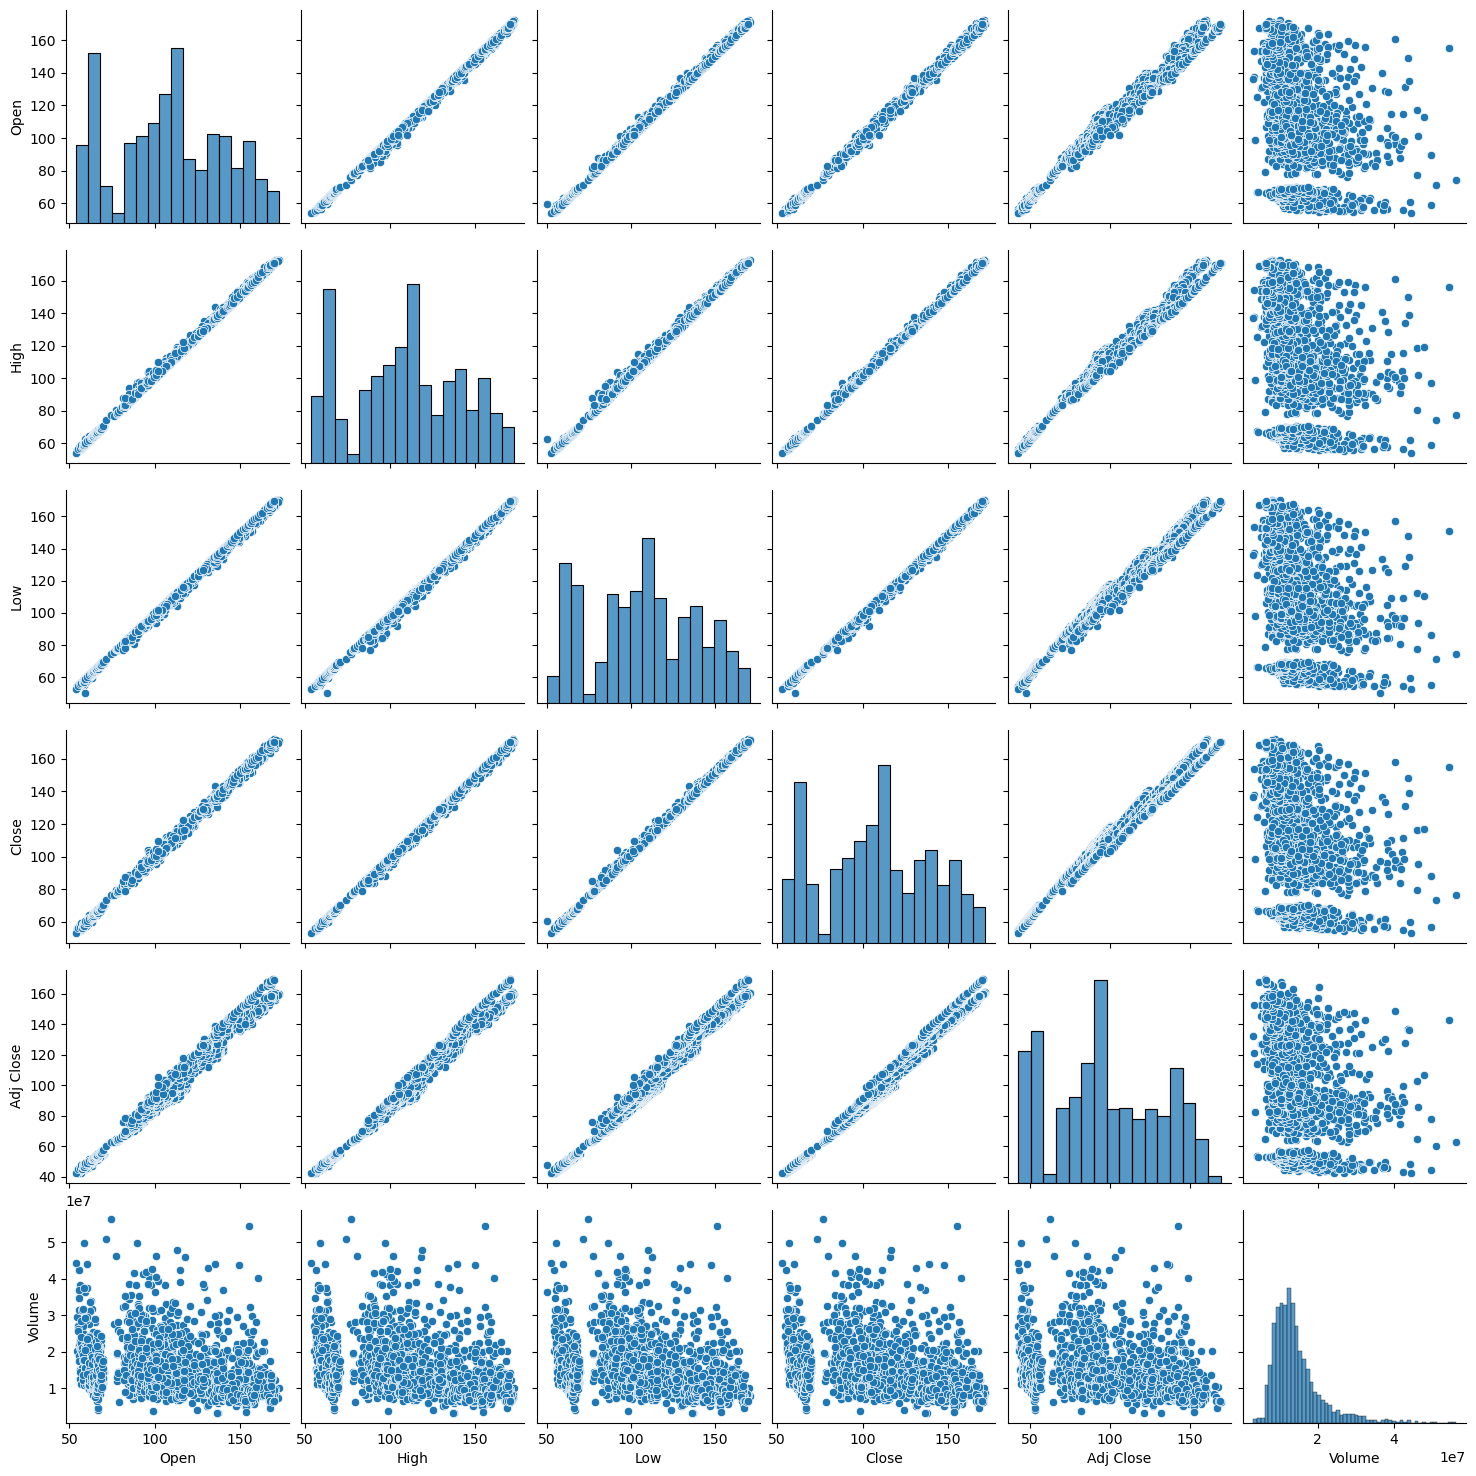

In [42]:
sns.pairplot(df)
plt.show()

## Time Series EDA

<AxesSubplot: xlabel='Date'>

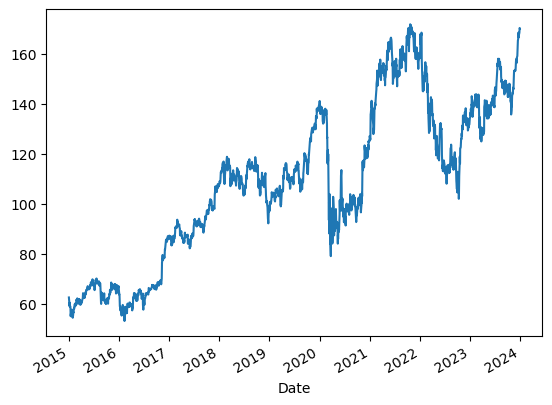

In [43]:
df['Close'].plot()

In [44]:
monthly_price = pd.pivot_table(df, values = 'Close', columns = df.index.month_name(), index = df.index.year)
monthly_price

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
2015,62.277619,66.239048,66.148182,58.936315,57.493000,68.316364,67.877272,61.037727,65.605500,66.785500,62.565000,61.806191
2016,61.470000,65.734348,85.173334,57.135000,58.473684,63.011000,62.922273,59.486818,62.966666,75.427143,68.166190,66.708095
2017,86.286316,92.087390,106.279000,88.632105,85.613000,92.196500,86.618636,90.150434,85.950454,99.457143,98.394090,92.395000
2018,110.422857,115.584783,99.850527,114.003158,112.354285,109.951905,107.734762,113.397143,110.885455,109.612857,109.275217,114.954210
2019,109.963810,108.412727,136.130951,104.010000,101.880000,114.567273,109.526001,103.267144,111.199545,129.981001,119.560435,116.671501
2020,92.085715,99.709048,122.079545,133.635790,136.395713,96.730456,100.595000,96.782728,91.523499,113.399000,99.993182,98.234285
2021,152.665713,157.566817,158.611365,142.604736,134.018947,153.030952,157.729090,153.046521,160.922001,166.095714,168.229048,159.693334
2022,129.051500,117.019565,132.302859,151.500000,156.411001,113.567500,119.952858,136.738694,122.931428,132.985237,114.830952,113.418572
2023,134.684737,151.352174,163.432000,141.432632,138.216002,151.701000,140.900000,132.321305,136.795000,148.827619,143.329090,146.439500


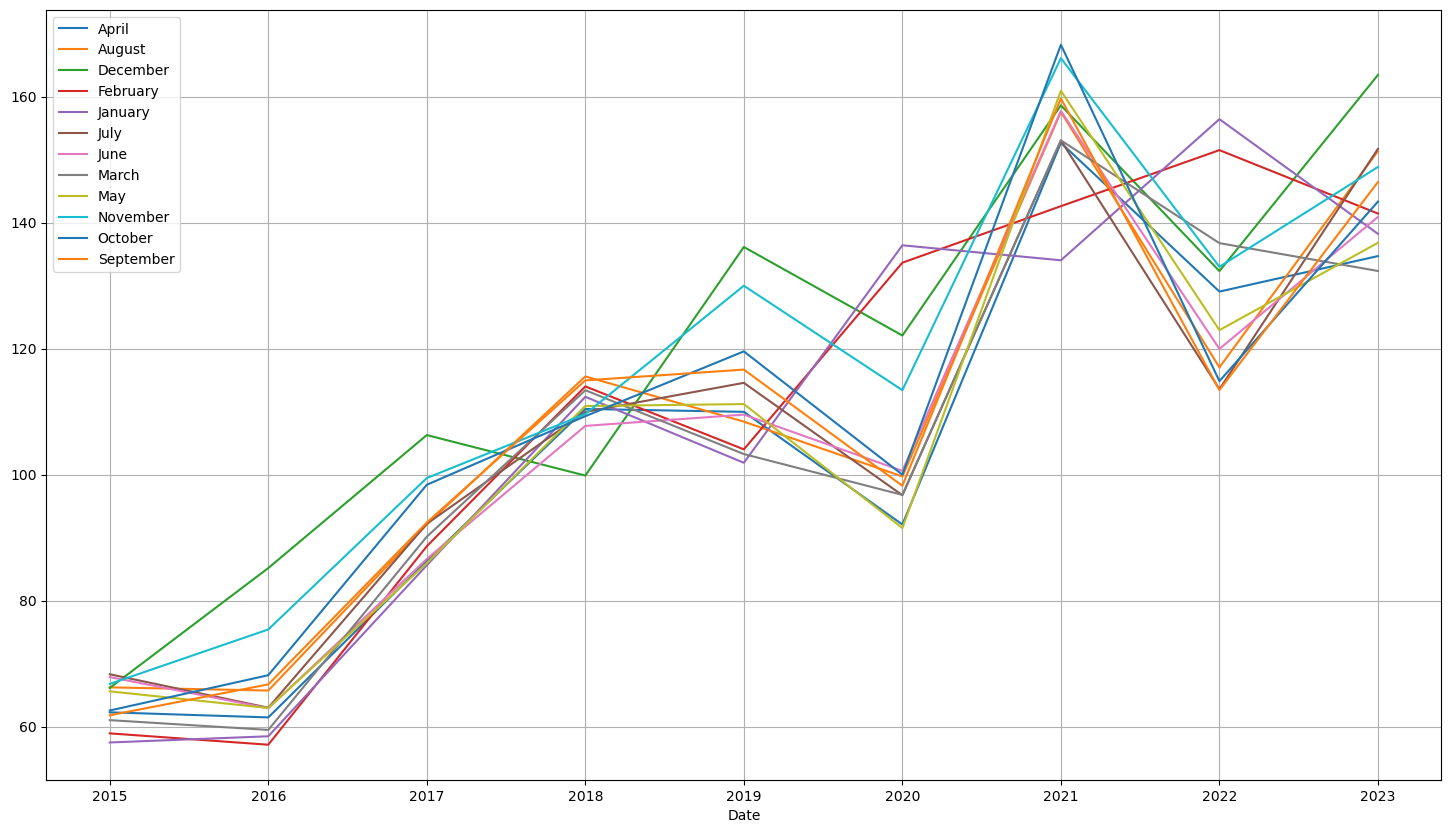

In [45]:
monthly_price.plot(figsize=(18,10))
plt.grid()
plt.legend(loc='upper left')

In [46]:
# New Column creation for next day's closing price
df['New_Close'] = df['Close'].shift(-1)

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,New_Close
Date,,,,,,,
2015-01-02,62.180000,62.959999,62.070000,62.490002,48.549877,12600000,60.549999
2015-01-05,62.060001,62.279999,60.230000,60.549999,47.042656,20100600,58.980000
2015-01-06,60.639999,60.750000,58.349998,58.980000,45.822876,29074100,59.070000
2015-01-07,59.889999,59.889999,58.669998,59.070000,45.892803,23843200,60.389999
2015-01-08,59.970001,60.900002,59.970001,60.389999,46.918331,16971100,59.340000


## Strategy-1

In [156]:
df['Signal_Strategy1'] = np.where(df['New_Close'] > df['Close'], 1, 0)

## Strategy-2

In [157]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] =df['Close'].rolling(window=200).mean()
df['Signal_Strategy2'] = np.where(df['50_MA'] > df['200_MA'], 1, 0)

In [158]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,New_Close,Signal_Strategy1,50_MA,200_MA,Signal_Strategy2
Date,,,,,,,,,,,
2015-01-02,62.180000,62.959999,62.070000,62.490002,48.549877,12600000,60.549999,0,NaN,NaN,0
2015-01-05,62.060001,62.279999,60.230000,60.549999,47.042656,20100600,58.980000,0,NaN,NaN,0
2015-01-06,60.639999,60.750000,58.349998,58.980000,45.822876,29074100,59.070000,1,NaN,NaN,0
2015-01-07,59.889999,59.889999,58.669998,59.070000,45.892803,23843200,60.389999,1,NaN,NaN,0
2015-01-08,59.970001,60.900002,59.970001,60.389999,46.918331,16971100,59.340000,0,NaN,NaN,0


In [159]:
df_filtered = df.dropna()
X_1=df_filtered.drop(['New_Close','50_MA', '200_MA', 'Signal_Strategy2', 'Signal_Strategy1'], axis=1)
X_2=df_filtered.drop(['New_Close', '50_MA', '200_MA','Signal_Strategy1', 'Signal_Strategy2'], axis=1)
y1 = df_filtered['Signal_Strategy1']
y2 = df_filtered['Signal_Strategy2']

In [160]:
X_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-16,62.430000,62.650002,62.090000,62.430000,49.499371,17456600
2015-10-19,62.000000,62.770000,61.910000,62.220001,49.332863,14510400
2015-10-20,62.360001,62.820000,62.080002,62.520000,49.570728,11545100
2015-10-21,62.880001,62.959999,62.049999,62.060001,49.206017,12113400
2015-10-22,62.419998,63.580002,62.419998,63.189999,50.101955,15295700
...,...,...,...,...,...,...
2023-12-21,166.839996,168.089996,165.679993,167.500000,166.473465,7601700
2023-12-22,167.500000,168.229996,167.229996,167.399994,166.374069,6574900
2023-12-26,167.460007,168.770004,167.179993,168.389999,167.358017,4683600


In [161]:
X_2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-16,62.430000,62.650002,62.090000,62.430000,49.499371,17456600
2015-10-19,62.000000,62.770000,61.910000,62.220001,49.332863,14510400
2015-10-20,62.360001,62.820000,62.080002,62.520000,49.570728,11545100
2015-10-21,62.880001,62.959999,62.049999,62.060001,49.206017,12113400
2015-10-22,62.419998,63.580002,62.419998,63.189999,50.101955,15295700
...,...,...,...,...,...,...
2023-12-21,166.839996,168.089996,165.679993,167.500000,166.473465,7601700
2023-12-22,167.500000,168.229996,167.229996,167.399994,166.374069,6574900
2023-12-26,167.460007,168.770004,167.179993,168.389999,167.358017,4683600


## Visualizing Data stocks with 50 and 200 day moving average

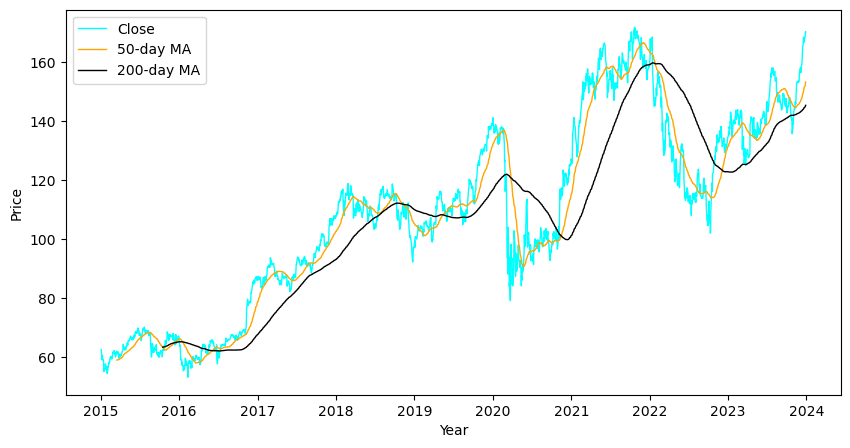

In [162]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Close', linewidth=1.0, color='cyan')
plt.plot(df.index, df['50_MA'], label='50-day MA', linewidth=1.0, color='orange')
plt.plot(df.index, df['200_MA'], label='200-day MA', linewidth=1.0, color='black')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## Splitting the dataset into test and train

In [163]:
X1_train, X1_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X_1, y1, y2, test_size=0.2)
X2_train, X2_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X_2, y1, y2, test_size=0.2)

In [185]:
# Defining Classifiers as tuples
classifiers = [
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('XGBoost', XGBClassifier())
]

# Train and evaluate classifiers for Strategy-1
print("Strategy - 1")
print('\n')
for name, clsf in classifiers:
    clsf.fit(X1_train, y1_train)
    accuracy = clsf.score(X1_test, y1_test)
    print(f'{name} Classifier Accuracy : {accuracy:.2f}')
print('\n')

# Train and evaluate classifiers for Strategy-2
print("Strategy - 2")
print('\n')
for name, clsf in classifiers:
    clsf.fit(X2_train, y2_train)
    accuracy = clsf.score(X2_test, y2_test)
    print(f'{name} Classifier Accuracy : {accuracy:.2f}')


Strategy - 1


KNN Classifier Accuracy : 0.55
Random Forest Classifier Accuracy : 0.48
Gradient Boosting Classifier Accuracy : 0.50
SVM Classifier Accuracy : 0.51
XGBoost Classifier Accuracy : 0.49


Strategy - 2


KNN Classifier Accuracy : 0.64
Random Forest Classifier Accuracy : 0.89
Gradient Boosting Classifier Accuracy : 0.89
SVM Classifier Accuracy : 0.69
XGBoost Classifier Accuracy : 0.91


## Extra Credits
### Hyper tunning the XGBoost Classifier model

In [199]:
# Define the parameter grid
param_xg = {
        'subsample': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'min_child_weight': [1, 5, 10]
}

xg_classifier = XGBClassifier()

# Perform Grid Search CV
grid_search_xg = GridSearchCV(estimator=xg_classifier, param_grid=param_xg)
grid_search_xg.fit(X2_train, y2_train)
best_params_xg = grid_search_xg.best_params_
print("Best Parameters for XGBoost Classifier:", best_params_xg)

Best Parameters for XGBoost Classifier: {'max_depth': 25, 'min_child_weight': 1, 'subsample': 1.0}


In [200]:
# Train the classifier with best parameters
best_xg_classifier = XGBClassifier(max_depth=25, subsample=1.0, min_child_weight=1)
best_xg_classifier.fit(X2_train, y2_train)
accuracy_xg = best_xg_classifier.score(X2_test, y2_test)
print(f'Best XGBoost Classifier Accuracy: {accuracy_xg:.2f}')

Best XGBoost Classifier Accuracy: 0.91
